In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
X, Y = make_blobs(n_samples=1000, n_features=2, centers=2)

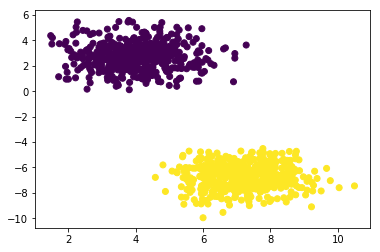

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [4]:
ones = np.ones([X.shape[0], 1])
X = np.hstack([ones, X])

X[:5]

array([[ 1.        ,  4.37463979,  1.93720401],
       [ 1.        ,  4.32290533,  3.59967956],
       [ 1.        ,  8.73855857, -5.00578934],
       [ 1.        ,  2.65989325,  4.45736517],
       [ 1.        ,  7.1619755 , -7.42091867]])

In [5]:
class LogisticRegression:
    
    def __init__(self, X_train, Y_train, lr = .1, epox=100):
        
        self.dim = X_train.shape[1]
        self.theta = np.zeros([self.dim])
        self.X_train = X_train
        self.Y_train = Y_train
        self.lr = lr
        self.epox = epox
        
    def hypothesis(self, x):
        z = np.dot(self.theta, x)
        return self.sigmoid(z)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
        
    def gradient_dec(self):
        
        gradient = np.zeros_like(self.theta)
        
        for xi, yi in zip(self.X_train, self.Y_train):
            yh = self.hypothesis(xi)
            gradient = gradient + (yi - yh) * xi
        
        gradient = gradient / self.X_train.shape[0] * self.lr
        self.theta = self.theta + gradient
    
    def fit(self):
        for _ in range(self.epox):
            self.gradient_dec()
    
    
            

In [6]:
model = LogisticRegression(X, Y)

In [7]:
model.gradient_dec()

model.fit()

In [8]:
model.theta

array([-0.17256805, -0.32128851, -1.25024048])

In [9]:
l_theta = np.array([-model.theta[0]/model.theta[2], -model.theta[1]/model.theta[2]])

print(l_theta)

[-0.13802789 -0.25698137]


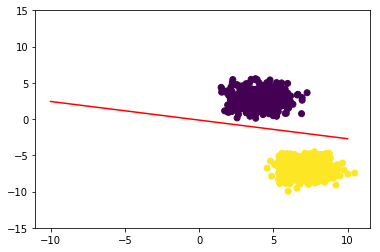

In [10]:
plt.ylim(-15, 15)

plt.scatter(X[:, 1], X[:, 2], c=Y)

X_test = [-10, 10]
Y_test = []

for x in X_test:
    Y_test.append(l_theta[0] + l_theta[1] * x)

plt.plot(X_test, Y_test, c = "red")

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [45]:
X, y = make_blobs(n_samples=1000, n_features=20, centers=2)

In [47]:
X.shape

(1000, 20)

In [38]:
X = preprocessing.scale(X)

In [39]:
pca = PCA(n_components=2)
pca.fit_transform(X)
X = pca.transform(X)

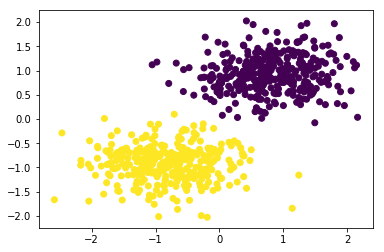

In [40]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
model.coef_

array([[-1.93841376e+00, -4.71651801e-04]])

In [44]:
model.intercept_

array([0.00089498])